# Market Basket Analysis (MBA): Filter item sets
* mlxtend apriori: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/

In [57]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori

%config InlineBackend.figure_format='retina'

In [58]:
print(f'pandas    version: {pd.__version__}')
print(f'mlxtend   version: {mlxtend.__version__}')

pandas    version: 2.0.3
mlxtend   version: 0.22.0


In [59]:
pd.Timestamp.now()

Timestamp('2023-07-16 00:48:50.111189')

In [60]:
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('K2D-Regular.ttf')
mpl.rc('font', family='K2D', size=12, weight=200)

## read data

In [61]:
url='data-2023.csv'
data=pd.read_csv(url)
data[:5]

,payment_date,ent,0C1CC1,0C1CCE,0C4C4Z,0C4CCJ,0C4CCZ,0C4CE1,0C4CE4,0C4CEC,...,XC4CC4,XC4CCE,XC4CCZ,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,YC1CC4
0,00:00.0,TCC4QCZJZQI,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,00:00.0,TCC4QCE34Z7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,00:00.0,TCC44Q3JQQ2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,00:00.0,TCC41JJZCRF,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,00:00.0,TCC4JZCJ1JK,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
# df=data['items'].str.get_dummies('|').astype(pd.SparseDtype("bool"))
# df[:5]
columns_to_drop = ['payment_date']
data.drop(columns_to_drop, axis=1, inplace=True)
df=data



In [63]:
df.set_index('ent', inplace=True)

In [64]:
df = df.head(1000)
print(df)

             0C1CC1  0C1CCE  0C4C4Z  0C4CCJ  0C4CCZ  0C4CE1  0C4CE4  0C4CEC  \
ent                                                                           
TCC4QCZJZQI       0       0       0       0       0       0       0       0   
TCC4QCE34Z7       0       0       0       0       0       0       0       0   
TCC44Q3JQQ2       0       0       0       0       0       0       0       0   
TCC41JJZCRF       0       0       0       0       0       0       0       0   
TCC4JZCJ1JK       0       0       0       0       0       0       0       0   
...             ...     ...     ...     ...     ...     ...     ...     ...   
TJCZJE4U          0       0       0       0       0       0       0       0   
TCCECRC1117       0       0       0       0       0       0       0       0   
TCCEC14EJ37       0       0       0       0       1       0       0       0   
TCC4Z411RQU       0       0       0       0       0       0       0       0   
TCC4RRQQQCU       0       0       0       0       0 

## find frequent item sets

In [65]:
from mlxtend.frequent_patterns import apriori, association_rules

# calculate frequent itemsets
frequent_itemsets = apriori(df, min_support=0.01, use_colnames=True)
print(frequent_itemsets.shape)
frequent_itemsets.head()

(134, 2)


c:\ProgramData\Anaconda3\envs\MADS8101\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.054,(0C4CCZ)
1,0.011,(0CECCR)
2,0.010,(0CECCZ)
3,0.032,(2C1CC3)
4,0.076,(2C1CCQ)


In [66]:
# generate association rules
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.shape)
rules.sort_values('lift',ascending=False).head(15)

(234, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
166,(8CJC1C),"(5C4CCE, 8C4CCR)",0.052,0.028,0.014,0.269231,9.615385,0.012544,1.330105,0.945148
163,"(5C4CCE, 8C4CCR)",(8CJC1C),0.028,0.052,0.014,0.500000,9.615385,0.012544,1.896000,0.921811
232,(8CJC1C),"(BC4C41, 8C4CCR)",0.052,0.023,0.011,0.211538,9.197324,0.009804,1.239122,0.940161
229,"(BC4C41, 8C4CCR)",(8CJC1C),0.023,0.052,0.011,0.478261,9.197324,0.009804,1.817000,0.912255
170,"(5C4CCE, 8C4CCR)",(DCJCC3),0.028,0.041,0.010,0.357143,8.710801,0.008852,1.491778,0.910700
171,(DCJCC3),"(5C4CCE, 8C4CCR)",0.041,0.028,0.010,0.243902,8.710801,0.008852,1.285548,0.923045
141,(8C4CC1),"(44C4, BC4C41)",0.080,0.015,0.010,0.125000,8.333333,0.008800,1.125714,0.956522
140,"(44C4, BC4C41)",(8C4CC1),0.015,0.080,0.010,0.666667,8.333333,0.008800,2.760000,0.893401
222,"(8C4CC1, BC4C41)",(8CJC1C),0.029,0.052,0.012,0.413793,7.957560,0.010492,1.617176,0.900446
227,(8CJC1C),"(8C4CC1, BC4C41)",0.052,0.029,0.012,0.230769,7.957560,0.010492,1.262300,0.922293


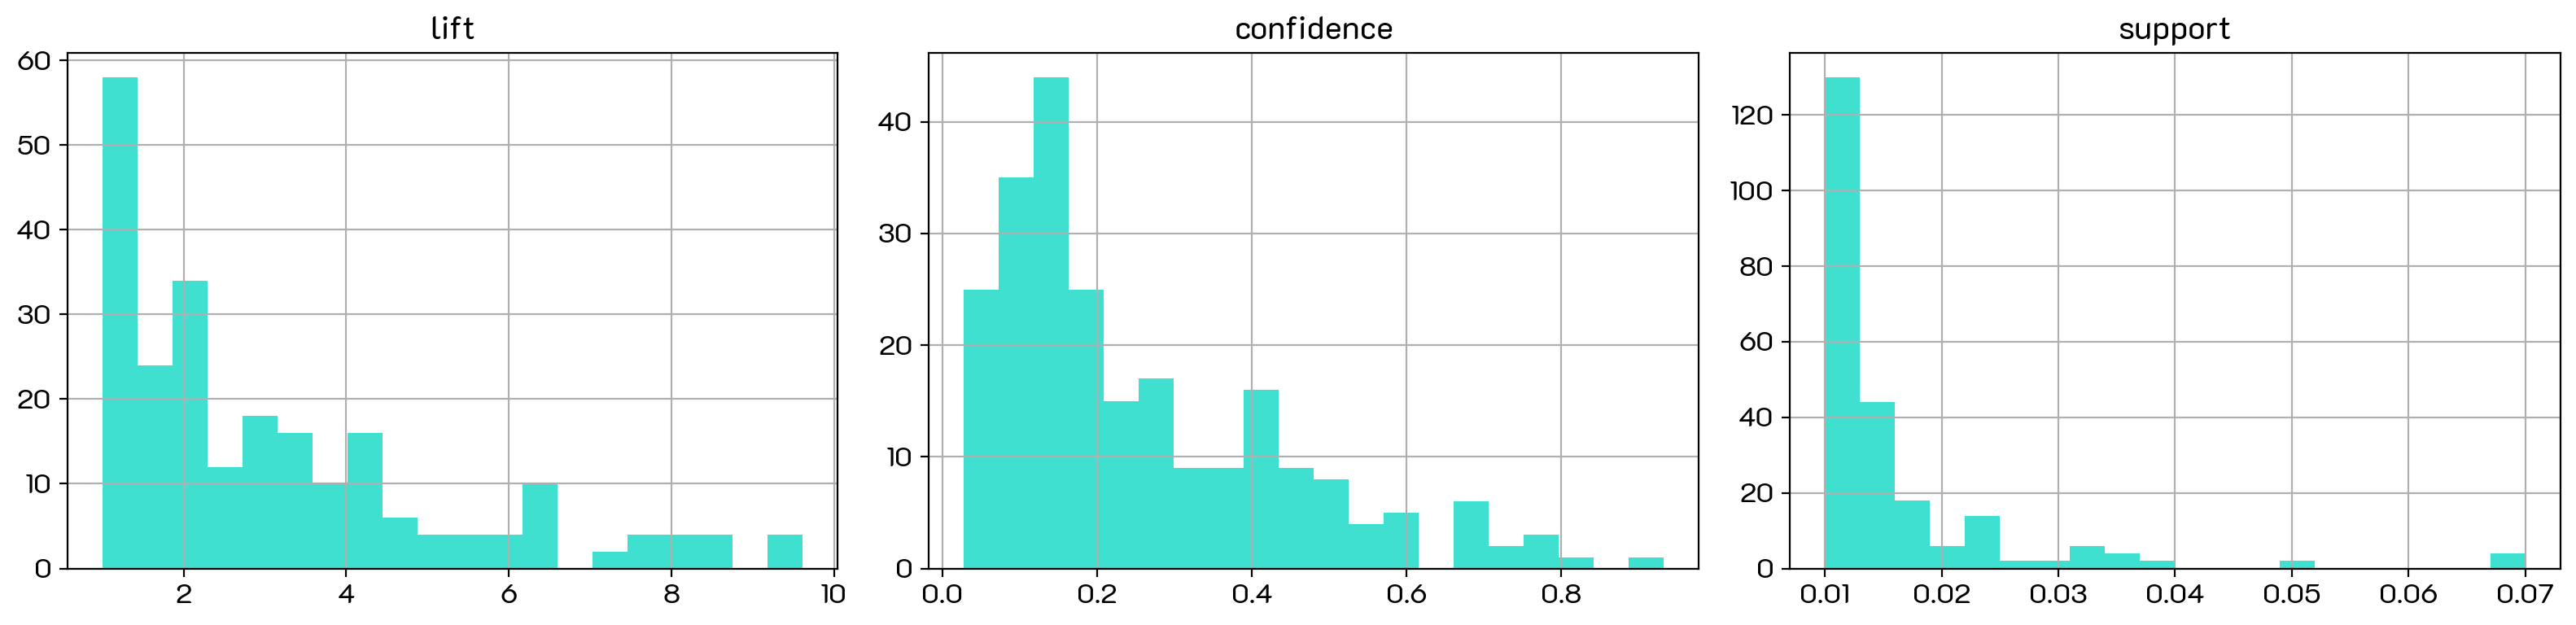

In [67]:
fig, axes = plt.subplots(1, 3, figsize=(16,4), tight_layout=True)
for var, ax in zip(['lift','confidence','support'], axes):
    rules[var].hist(bins=20, ax=ax, color='turquoise')
    ax.set_title(var)
plt.show()

c:\ProgramData\Anaconda3\envs\MADS8101\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


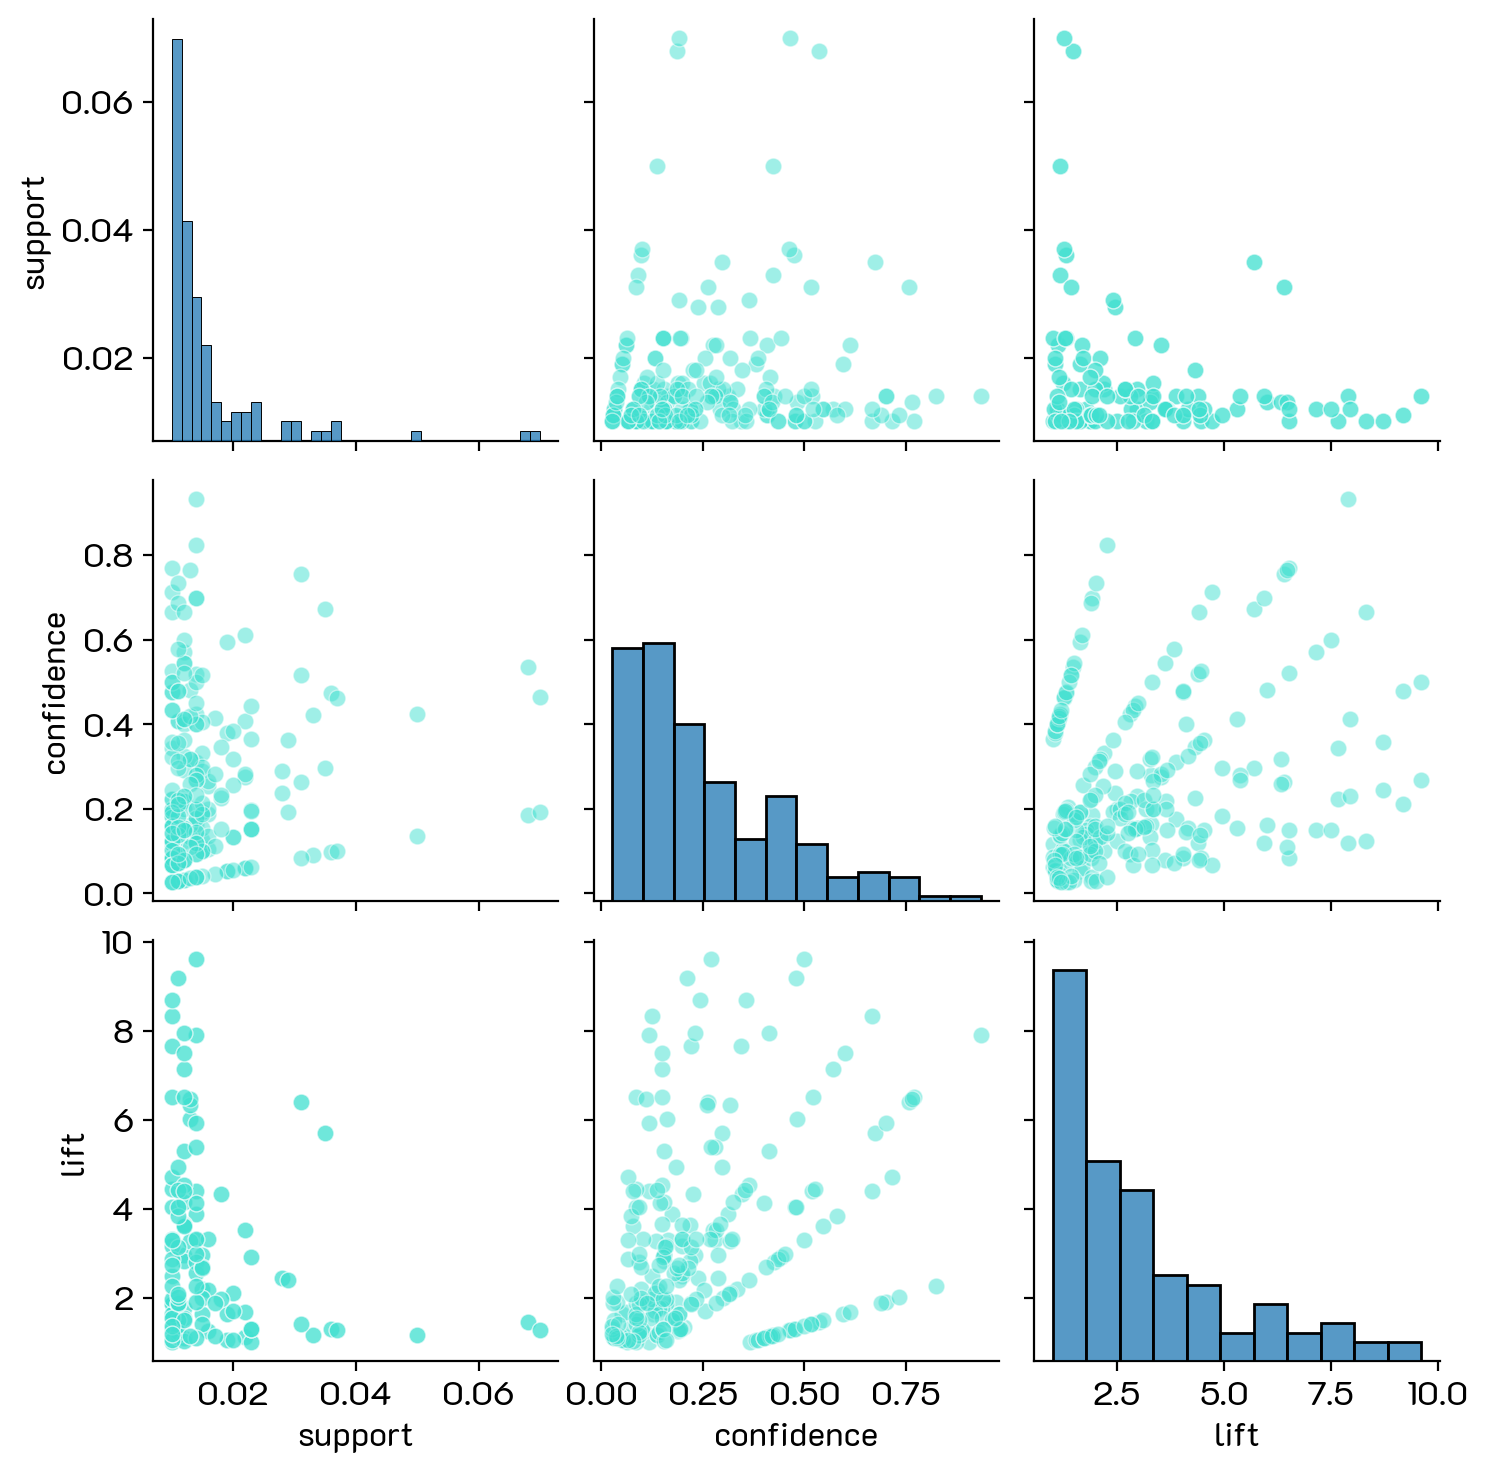

In [68]:
sns.pairplot(rules, vars=['support','confidence','lift'], plot_kws = {'color':'turquoise', 'alpha':.5});

## rules and metrices

In [69]:
import pandas as pd

# นำเข้าข้อมูลที่ต้องการใช้งาน
# rules = pd.read_csv('path/to/rules.csv')

simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] > 1.05) & (rules['confidence'] > 0.5)]
print(simple_rules.shape)
simple_rules.sort_values('lift', ascending=False).head(20)


(9, 10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
105,(SCJCC4),(8C4CC1),0.021,0.080,0.012,0.571429,7.142857,0.010320,2.146667,0.878447
124,(DCJCC3),(8C4CCR),0.041,0.118,0.031,0.756098,6.407606,0.026162,3.616200,0.880016
118,(8CJC1C),(8C4CCR),0.052,0.118,0.035,0.673077,5.704042,0.028864,2.697882,0.869922
120,(8CJCEZ),(8C4CCR),0.019,0.118,0.010,0.526316,4.460303,0.007758,1.862000,0.790826
55,(5CJC4Q),(8C4CCR),0.027,0.118,0.014,0.518519,4.394225,0.010814,1.831846,0.793863
14,(2C1CCZ),(6CQC41),0.036,0.365,0.022,0.611111,1.674277,0.008860,1.632857,0.417767
9,(2C1CC3),(6CQC41),0.032,0.365,0.019,0.593750,1.626712,0.007320,1.563077,0.397999
13,(2C1CCW),(6CQC41),0.127,0.365,0.068,0.535433,1.466940,0.021645,1.366864,0.364615
77,(XC4CCE),(6CQC41),0.060,0.365,0.031,0.516667,1.415525,0.009100,1.313793,0.312286


In [70]:
edgelist = []
for i,x in simple_rules.iterrows():
    n1, = x['antecedents']
    n2, = x['consequents']
    attr = { 'lift': round(x['lift'],4), 'confidence' : round(x['confidence'],4) }
    edgelist.append((n1,n2,attr))

nodes = { n1 for n1, n2, attr in edgelist}.union({ n2 for n1, n2, attr in edgelist})

support_df = frequent_itemsets[frequent_itemsets['itemsets'].apply(len)==1].copy()
support_df['item'] = support_df['itemsets'].apply(lambda x: list(x)[0])
support_df = support_df[support_df['item'].isin(nodes)]

nodelist = []
for i,x in support_df.iterrows():
    n = x['item']
    attr = { 'support' : round(x['support'],4) }
    nodelist.append((n, attr))

# create graph
G = nx.DiGraph()

G.add_nodes_from(nodelist)
G.add_edges_from(edgelist)

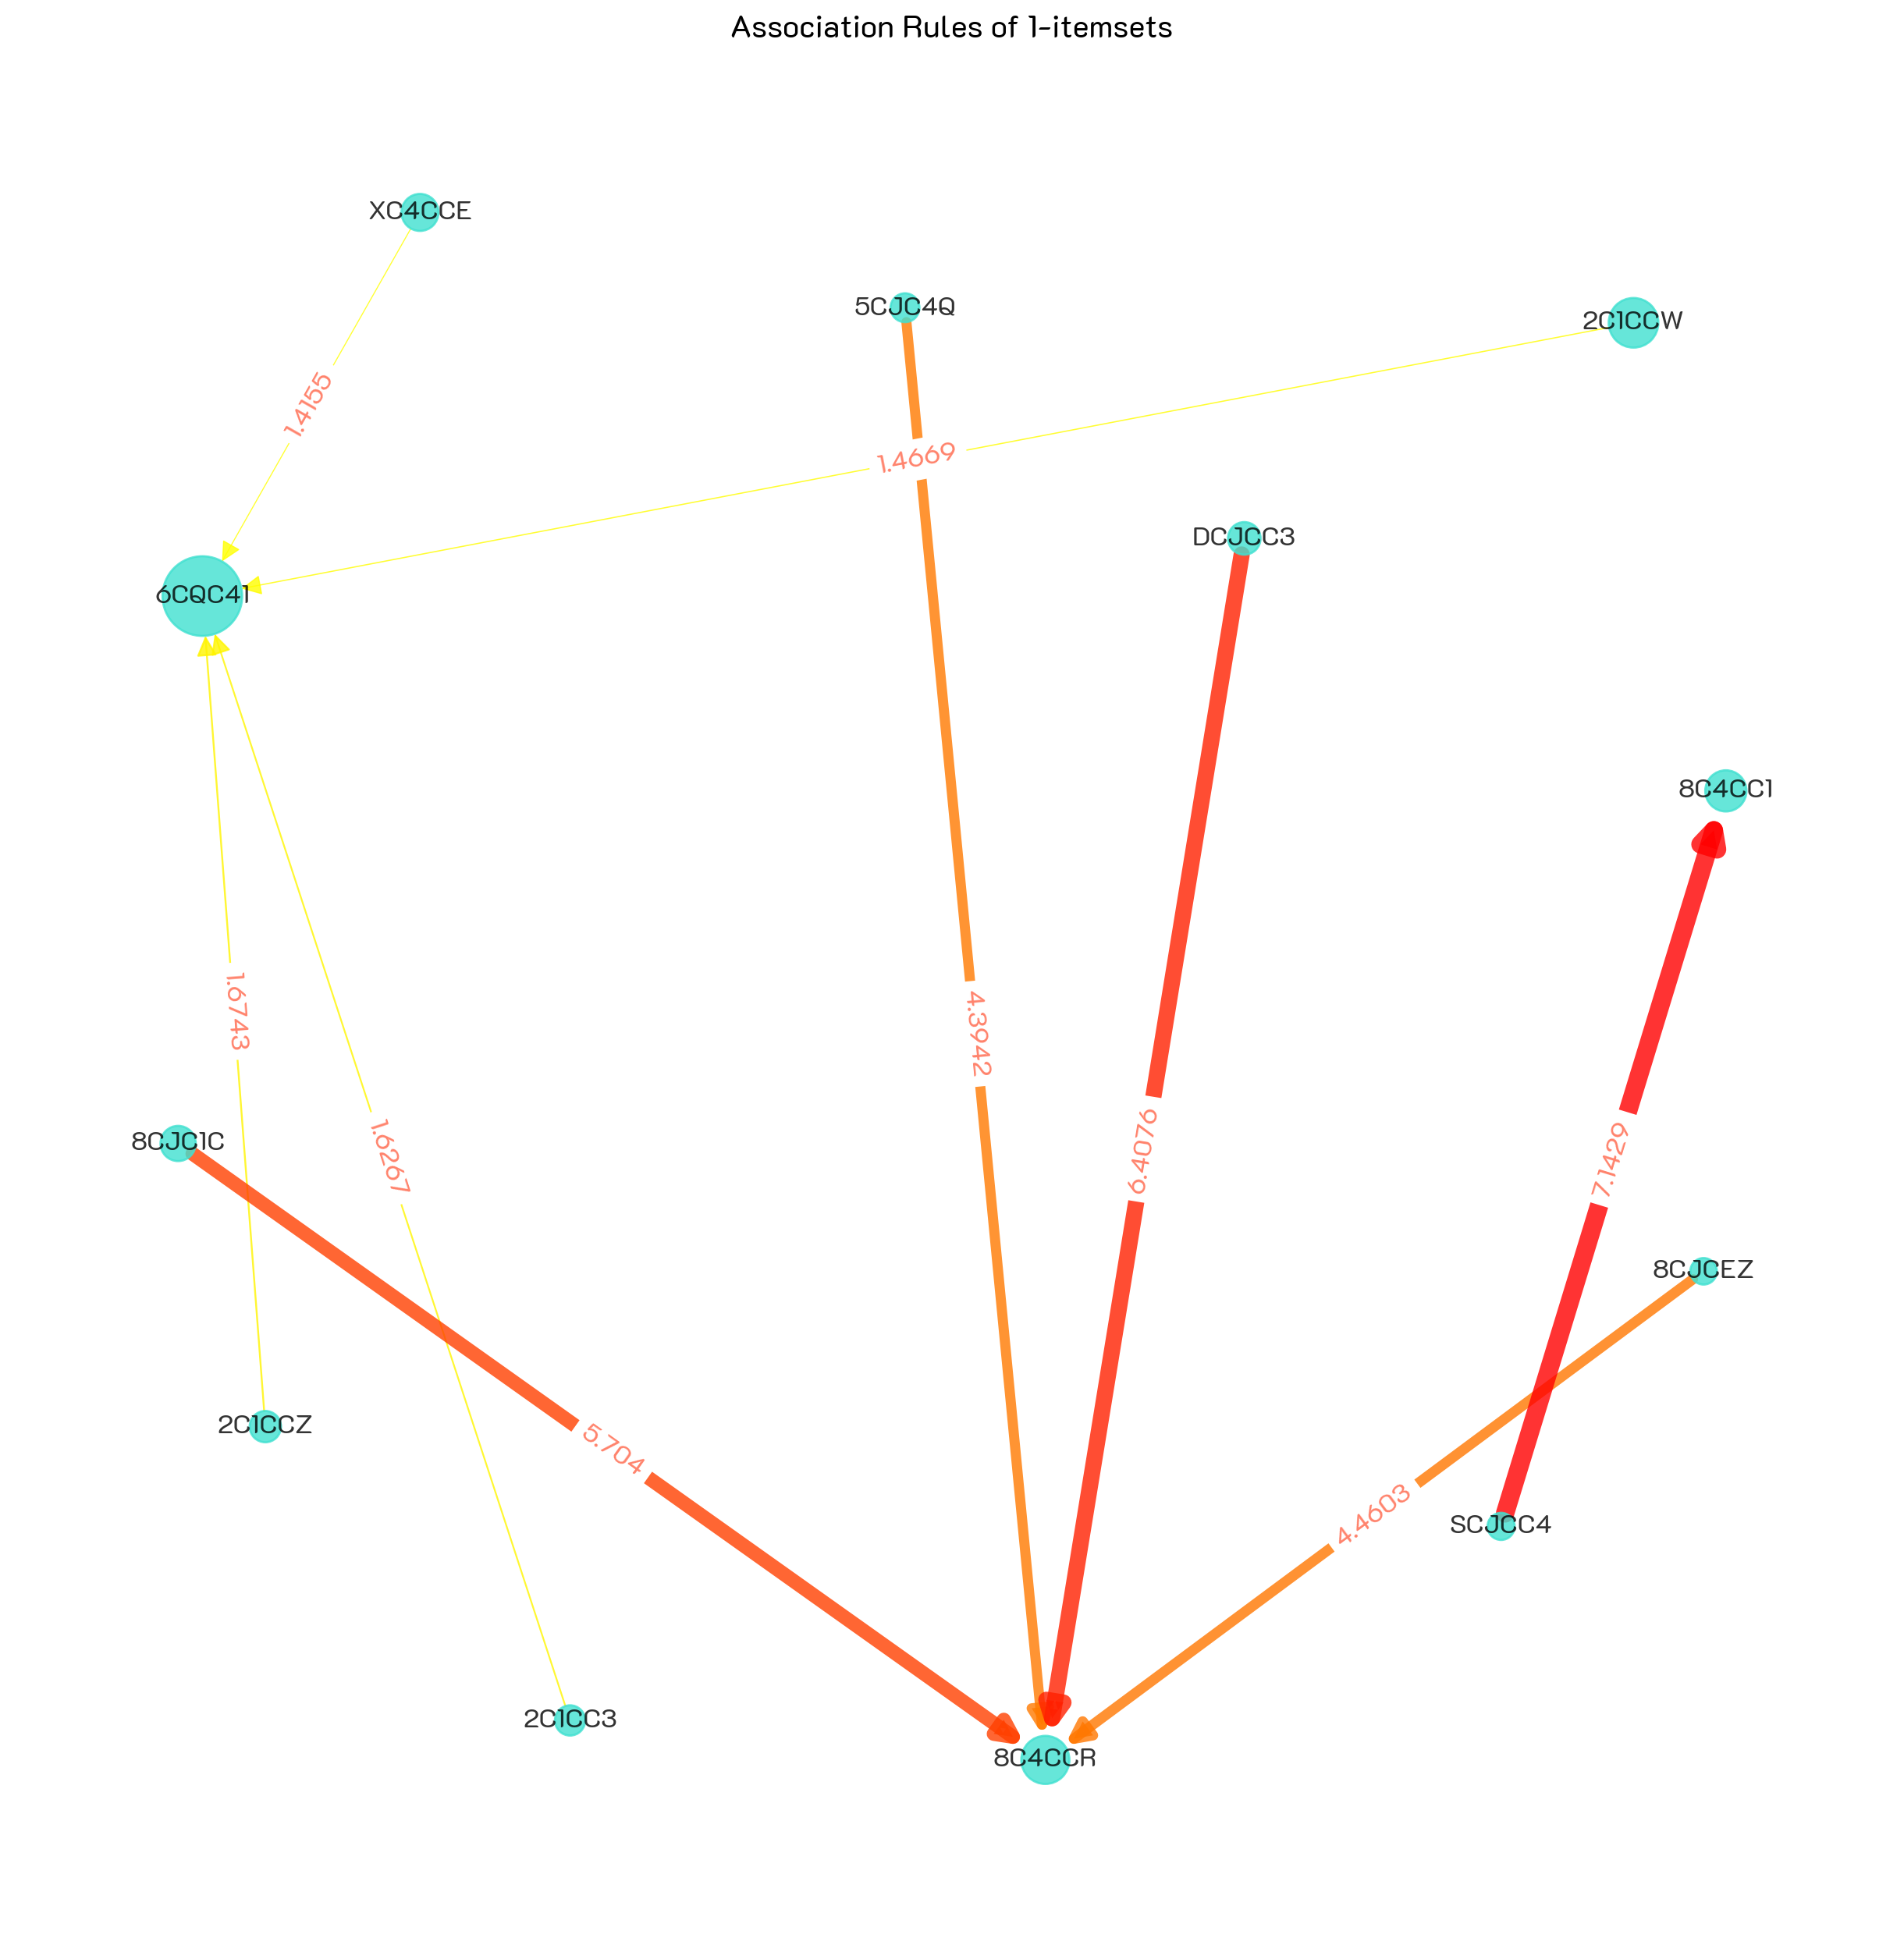

In [71]:
nodelist, node_size = zip(*[(n,d['support']) for n,d in G.nodes(data=True)])
node_size = 150 + ((np.array(node_size) - min(node_size)) / (max(node_size) - min(node_size)))*1200
edgelist, width = zip(*[((u,v), d['lift'])for u,v,d in G.edges(data=True)])

width = .5 + ((np.array(width) - min(width)) / (max(width) - min(width)))*8

labels_params = {'font_family': 'K2D', 'alpha':.8, 'font_size':12}

plt.figure(figsize=(12,12))

# pos = nx.spring_layout(G, k=5, weight='lift', iterations=120, seed=120, scale=2.5)
pos = nx.spring_layout(G, k=5, weight='lift', iterations=80, seed=90, scale=2.5)
nx.draw(G, pos, with_labels=True, arrowsize=20, 
        edgelist=edgelist, width=width, edge_color=width, edge_cmap=plt.cm.autumn_r, #edge_color='.75',
        nodelist=nodelist, node_size=node_size, node_color='turquoise', 
        **labels_params)
edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='tomato',  **labels_params)

plt.title('Association Rules of 1-itemsets')
# plt.savefig('plots/association-rules-1.jpg', dpi=120)
plt.show()

# Explore Rules

In [72]:
# Recommend 1 item based on 2 items
rules[(rules['antecedents'].apply(len) == 2) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
163,"(5C4CCE, 8C4CCR)",(8CJC1C),0.028,0.052,0.014,0.500000,9.615385,0.012544,1.896000,0.921811
229,"(BC4C41, 8C4CCR)",(8CJC1C),0.023,0.052,0.011,0.478261,9.197324,0.009804,1.817000,0.912255
170,"(5C4CCE, 8C4CCR)",(DCJCC3),0.028,0.041,0.010,0.357143,8.710801,0.008852,1.491778,0.910700
140,"(44C4, BC4C41)",(8C4CC1),0.015,0.080,0.010,0.666667,8.333333,0.008800,2.760000,0.893401
222,"(8C4CC1, BC4C41)",(8CJC1C),0.029,0.052,0.012,0.413793,7.957560,0.010492,1.617176,0.900446
164,"(8CJC1C, 5C4CCE)",(8C4CCR),0.015,0.118,0.014,0.933333,7.909605,0.012230,13.230000,0.886875
139,"(8C4CC1, BC4C41)",(44C4),0.029,0.045,0.010,0.344828,7.662835,0.008695,1.457632,0.895469
156,"(BC4C41, 5C4CC4)",(8C4CC1),0.020,0.080,0.012,0.600000,7.500000,0.010400,2.300000,0.884354
224,"(BC4C41, 8CJC1C)",(8C4CC1),0.023,0.080,0.012,0.521739,6.521739,0.010160,1.923636,0.866598
169,"(DCJCC3, 5C4CCE)",(8C4CCR),0.013,0.118,0.010,0.769231,6.518905,0.008466,3.822000,0.857751


In [73]:
# Recommend 1 item based on 3 items
rules[(rules['antecedents'].apply(len) == 3) & (rules['consequents'].apply(len) == 1)].sort_values('lift', ascending=False).head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


# Collaborative Filtering - Item Similarity

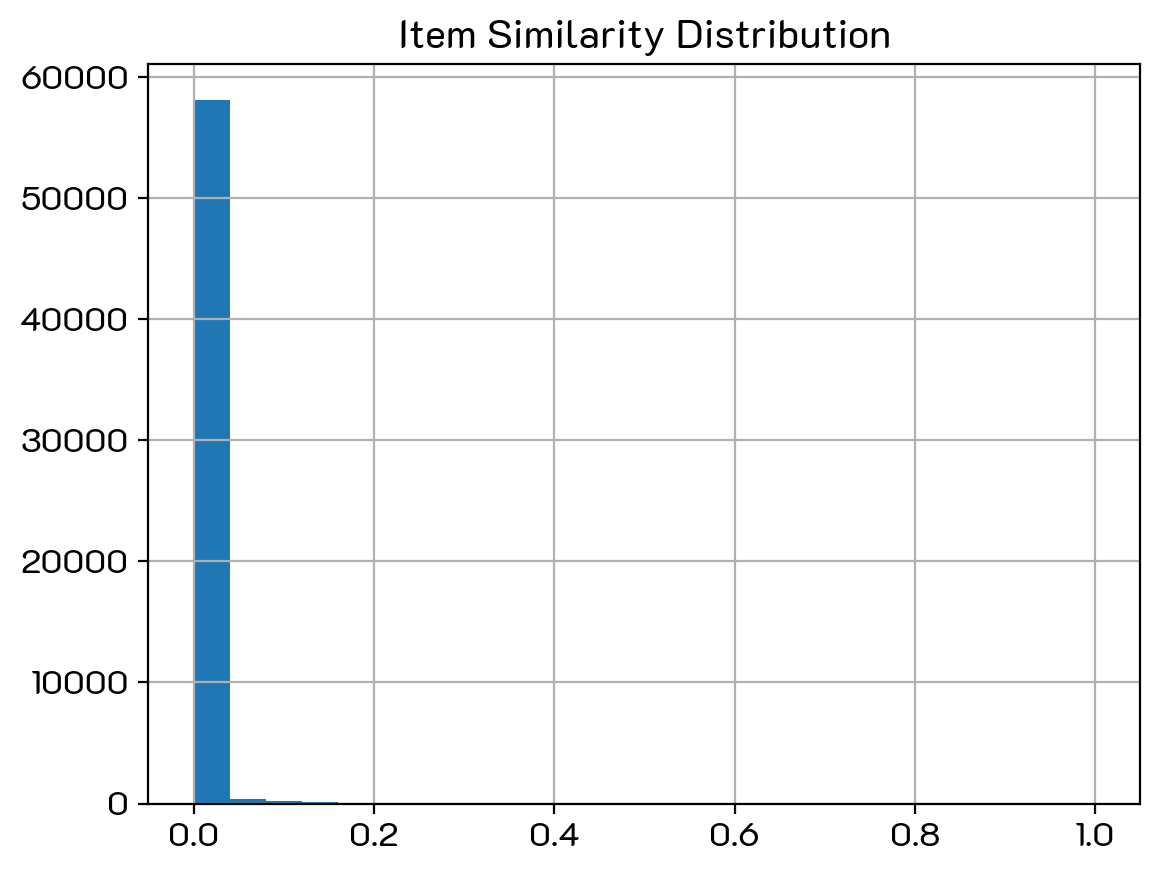

In [74]:
from sklearn.metrics.pairwise import cosine_similarity

X = df.T
item_names = df.columns
item_sim = cosine_similarity(X)
item_sim = pd.DataFrame(item_sim, index=item_names, columns=item_names)
item_sim = item_sim.unstack().reset_index()
item_sim.columns = ['item1','item2','sim']
item_sim['sim'].hist(bins=25)
plt.title('Item Similarity Distribution');

In [75]:
sim_threshold = 0.65
sim_df = item_sim[item_sim.apply(lambda x: x['item1']!=x['item2'], axis=1) & item_sim['sim'].between(sim_threshold, 1)]
sim_df.sort_values('sim', ascending=False)

,item1,item2,sim
46390,KCJC13,PC4CCW,0.707107
50021,KCQCEJ,KCQCEQ,0.707107
50022,KCQCEJ,KCQCER,0.707107
50263,KCQCEQ,KCQCEJ,0.707107
50506,KCQCER,KCQCEJ,0.707107
53650,PC4CCW,KCJC13,0.707107
53699,PC4CCW,XCJCC3,0.707107
58297,XCJCC3,PC4CCW,0.707107


C:\Users\puwad\AppData\Local\Temp\ipykernel_3036\757491049.py:13: RuntimeWarning: invalid value encountered in divide
  width = 1 + ((np.array(weights) - min(weights)) / (max(weights) - min(weights))) * 3


Number of nodes: 6
Number of edges: 4


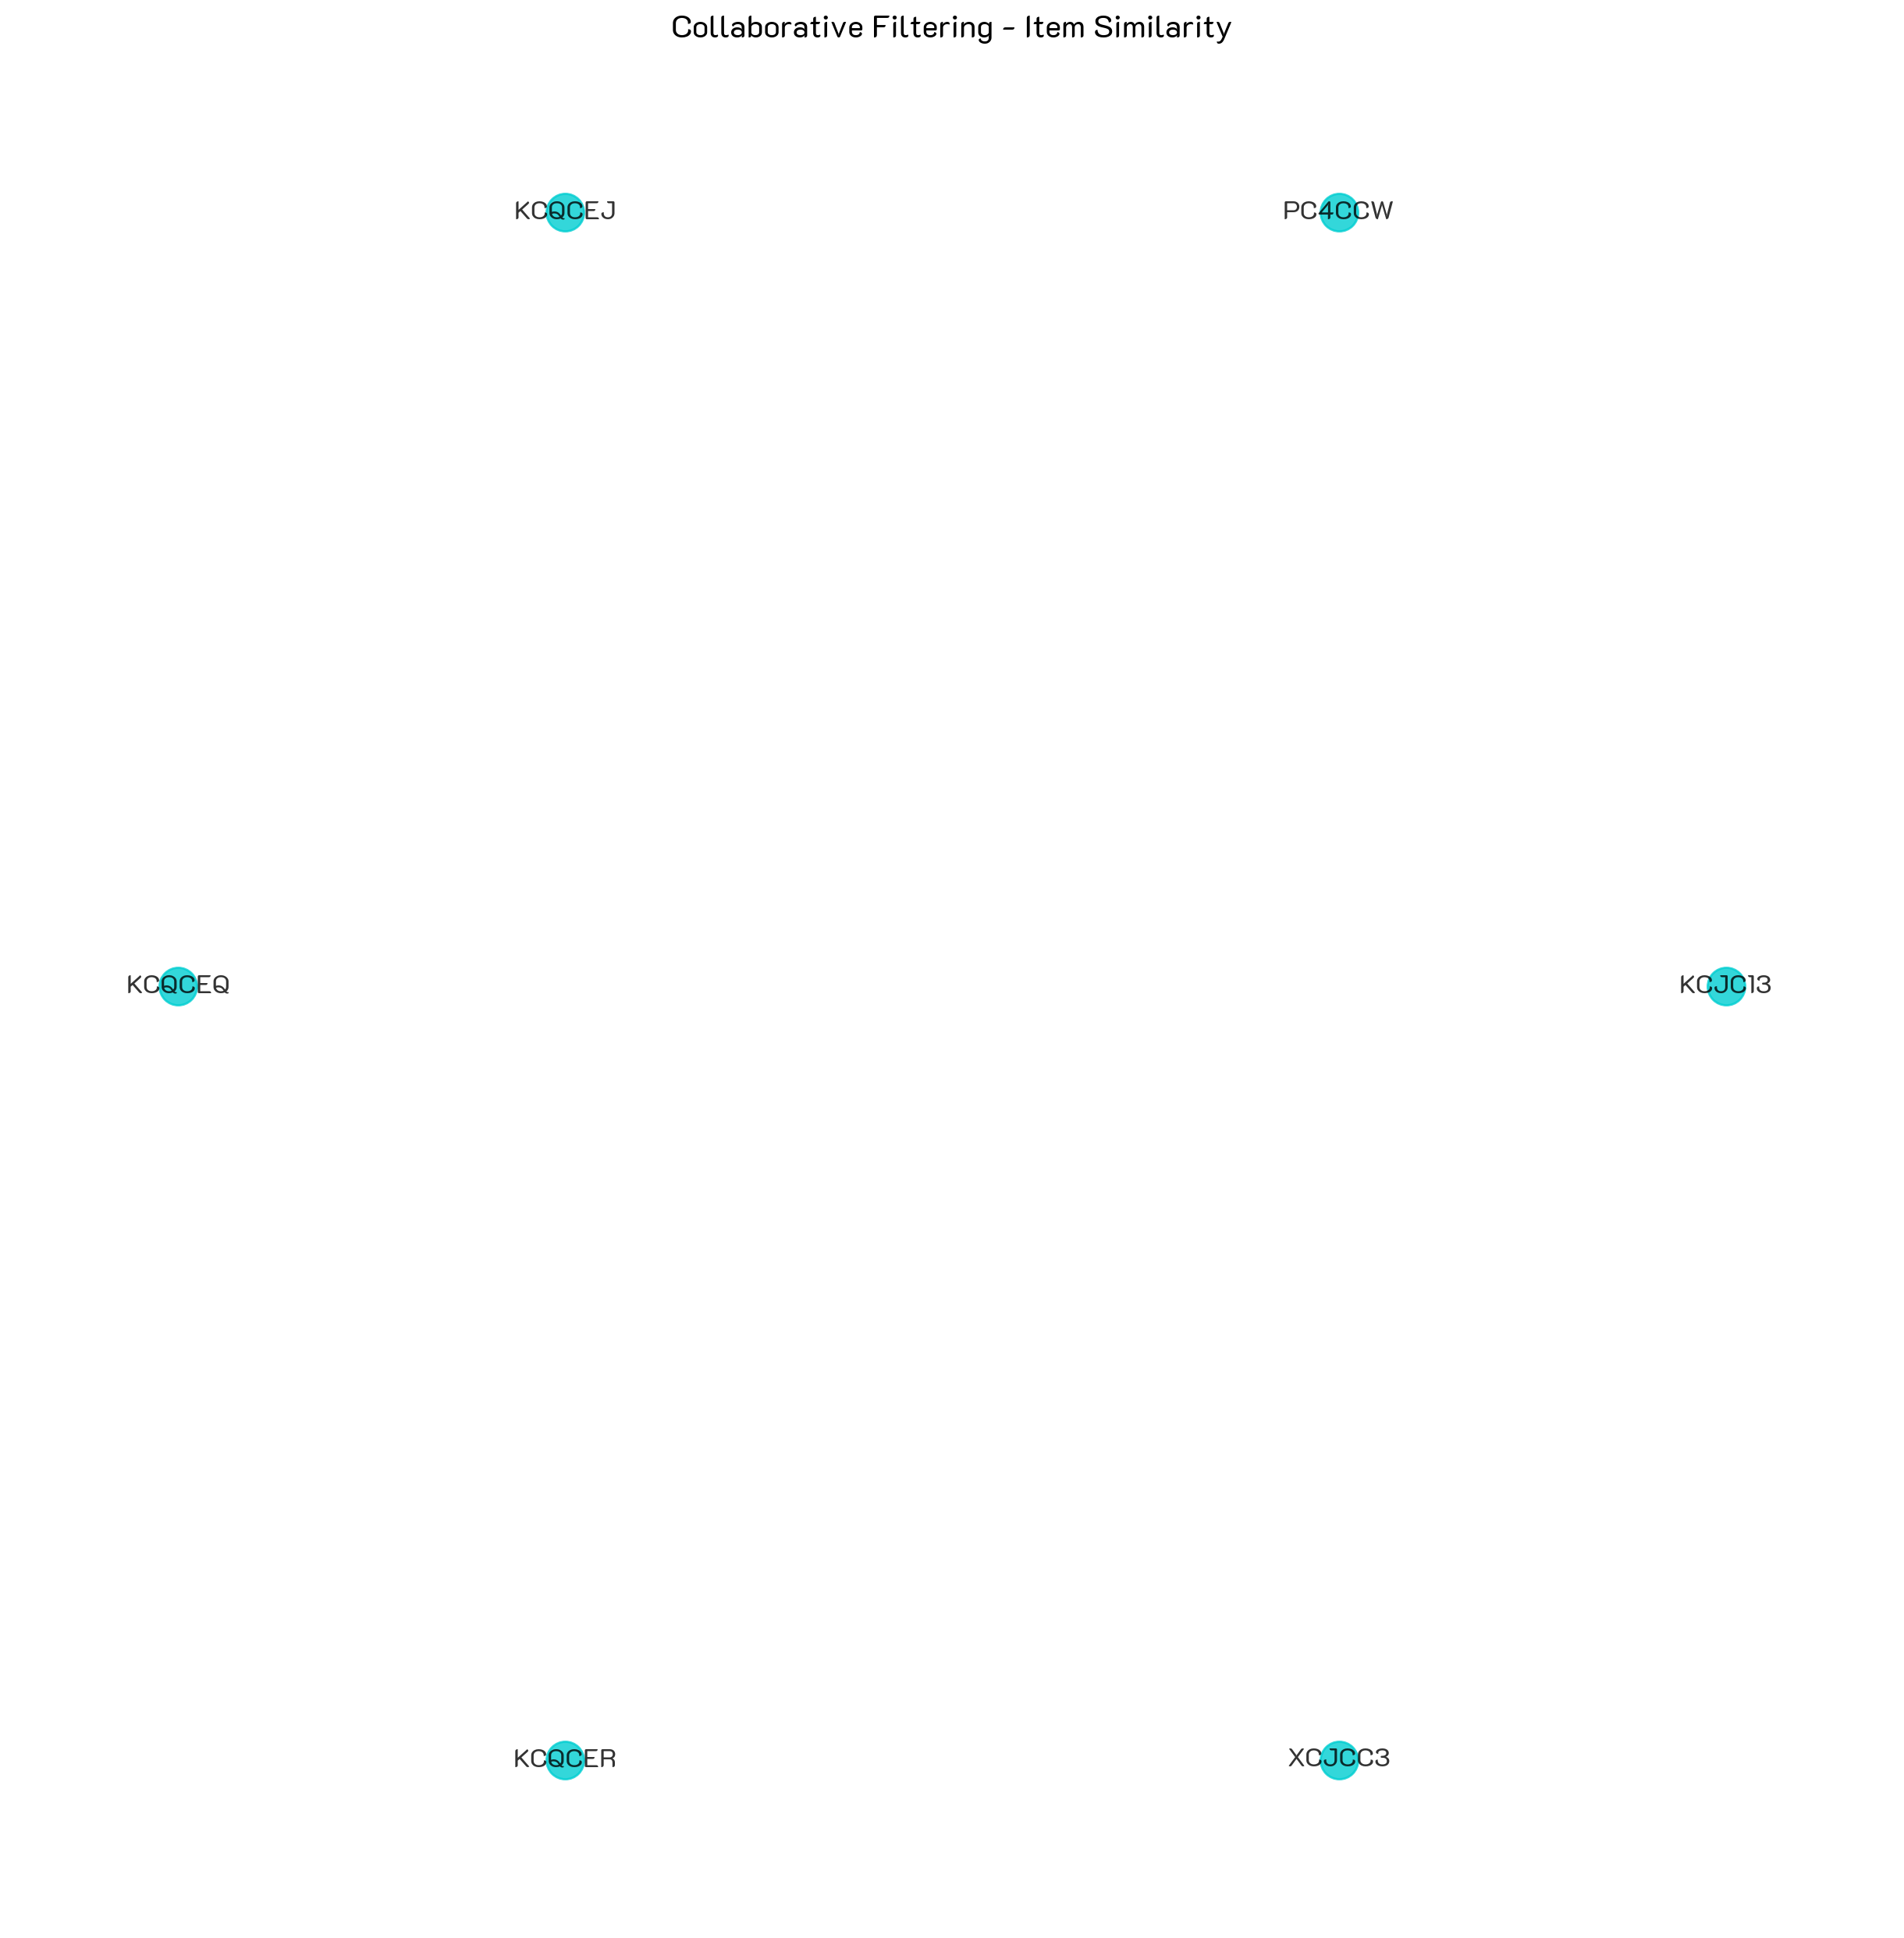

In [76]:
#print("Number of nodes:", nx.number_of_nodes(G))
#print("Number of edges:", nx.number_of_edges(G))

import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_weighted_edges_from([(x['item1'], x['item2'], round(x['sim'], 2)) for i, x in sim_df.iterrows()])

labels_params = {'font_family': 'K2D', 'alpha': 0.8, 'font_size': 12}

edgelist, weights = zip(*[((u, v), d['weight']) for u, v, d in G.edges(data=True)])
width = 1 + ((np.array(weights) - min(weights)) / (max(weights) - min(weights))) * 3

plt.figure(figsize=(12, 12))
pos = nx.circular_layout(G, scale=5)
nx.draw(G, pos, with_labels=True, node_color='darkturquoise',
        edgelist=edgelist, width=width,
        edge_color=weights, edge_cmap=plt.cm.autumn_r,
        **labels_params)

# Print graph information
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

plt.title('Collaborative Filtering - Item Similarity')
plt.show()



# Matrix Factorization

In [77]:
from sklearn.decomposition import NMF

# X = df.drop(['ครีมกันแดด','กระเป๋า','ชาบู'],axis=1) # remove items that all users use
X = df
n_factors = 12

nmf = NMF(n_factors, random_state=48)
W = nmf.fit_transform(X)
H = nmf.components_
print(f'Reconstruction error: {nmf.reconstruction_err_}')

# reconstruct rating matrix -> recommendation 
rec_df = pd.DataFrame(W @ H, columns=X.columns, index=X.index)
rec_df.head()


Reconstruction error: 28.83458260186712


,0C1CC1,0C1CCE,0C4C4Z,0C4CCJ,0C4CCZ,0C4CE1,0C4CE4,0C4CEC,0C4CEE,0C4CER,...,XC4CC4,XC4CCE,XC4CCZ,XCECCJ,XCECCQ,XCJC4C,XCJCC3,XCJCCZ,XCQCC4,YC1CC4
ent,,,,,,,,,,,,,,,,,,,,,
TCC4QCZJZQI,0.0,0.0,0.0,0.0,0.078181,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.041155,0.0,0.0,0.0,0.0,0.002720,0.0,0.0,0.0
TCC4QCE34Z7,0.0,0.0,0.0,0.0,0.021241,0.0,0.0,0.0,0.0,0.0,...,0.014007,0.070582,0.0,0.0,0.0,0.0,0.002720,0.0,0.0,0.0
TCC44Q3JQQ2,0.0,0.0,0.0,0.0,0.009365,0.0,0.0,0.0,0.0,0.0,...,0.015265,0.051695,0.0,0.0,0.0,0.0,0.000056,0.0,0.0,0.0
TCC41JJZCRF,0.0,0.0,0.0,0.0,0.000720,0.0,0.0,0.0,0.0,0.0,...,0.000060,0.012385,0.0,0.0,0.0,0.0,0.000162,0.0,0.0,0.0
TCC4JZCJ1JK,0.0,0.0,0.0,0.0,0.016268,0.0,0.0,0.0,0.0,0.0,...,0.002261,0.004729,0.0,0.0,0.0,0.0,0.000005,0.0,0.0,0.0


In [78]:
# rating_df = df.reset_index().melt(id_vars='index') \
#     .merge(rec_df.reset_index().melt(id_vars='index'), left_on=['index','variable'], right_on=['index','variable']) \
#     .rename({'variable':'item', 'value_x' : 'r', 'value_y' : 'r_pred' }, axis=1) 
# rating_df
rating_df = df.reset_index().melt(id_vars='ent') \
    .merge(rec_df.reset_index().melt(id_vars='ent'), left_on=['ent','variable'], right_on=['ent','variable']) \
    .rename({'variable':'item', 'value_x' : 'r', 'value_y' : 'r_pred' }, axis=1) 
rating_df
rating_df.to_csv('rating_df2.csv', index=False)

# Recommended item for each user


In [79]:
# recommendation is the not-purchased items with the highest predicted rating
rec_items = rating_df[rating_df['r']==0].sort_values(['ent','r_pred'], ascending=False).groupby('ent').nth(0)
rec_items
rec_items.to_csv('rec_items2.csv', index=False)

In [80]:
import umap

temp = pd.DataFrame(np.vstack([W, H.T]))
temp.shape

reducer = umap.UMAP()
embed = reducer.fit_transform(temp)
embed.shape

(1243, 2)

In [81]:
latent_df = pd.DataFrame(embed, columns=['x','y'])
latent_df['type'] = ['user'] * W.shape[0] + ['item'] * H.shape[1]
latent_df['label'] = list(X.index) + list(X.columns)
latent_df

,x,y,type,label
0,4.635746,32.353596,user,TCC4QCZJZQI
1,1.951213,7.554294,user,TCC4QCE34Z7
2,19.781330,-5.621686,user,TCC44Q3JQQ2
3,19.326488,-5.787952,user,TCC41JJZCRF
4,7.536981,-7.438129,user,TCC4JZCJ1JK
...,...,...,...,...
1238,3.084837,-18.052830,item,XCJC4C
1239,2.175646,14.734571,item,XCJCC3
1240,3.368454,-18.460291,item,XCJCCZ
1241,3.028672,-18.516693,item,XCQCC4


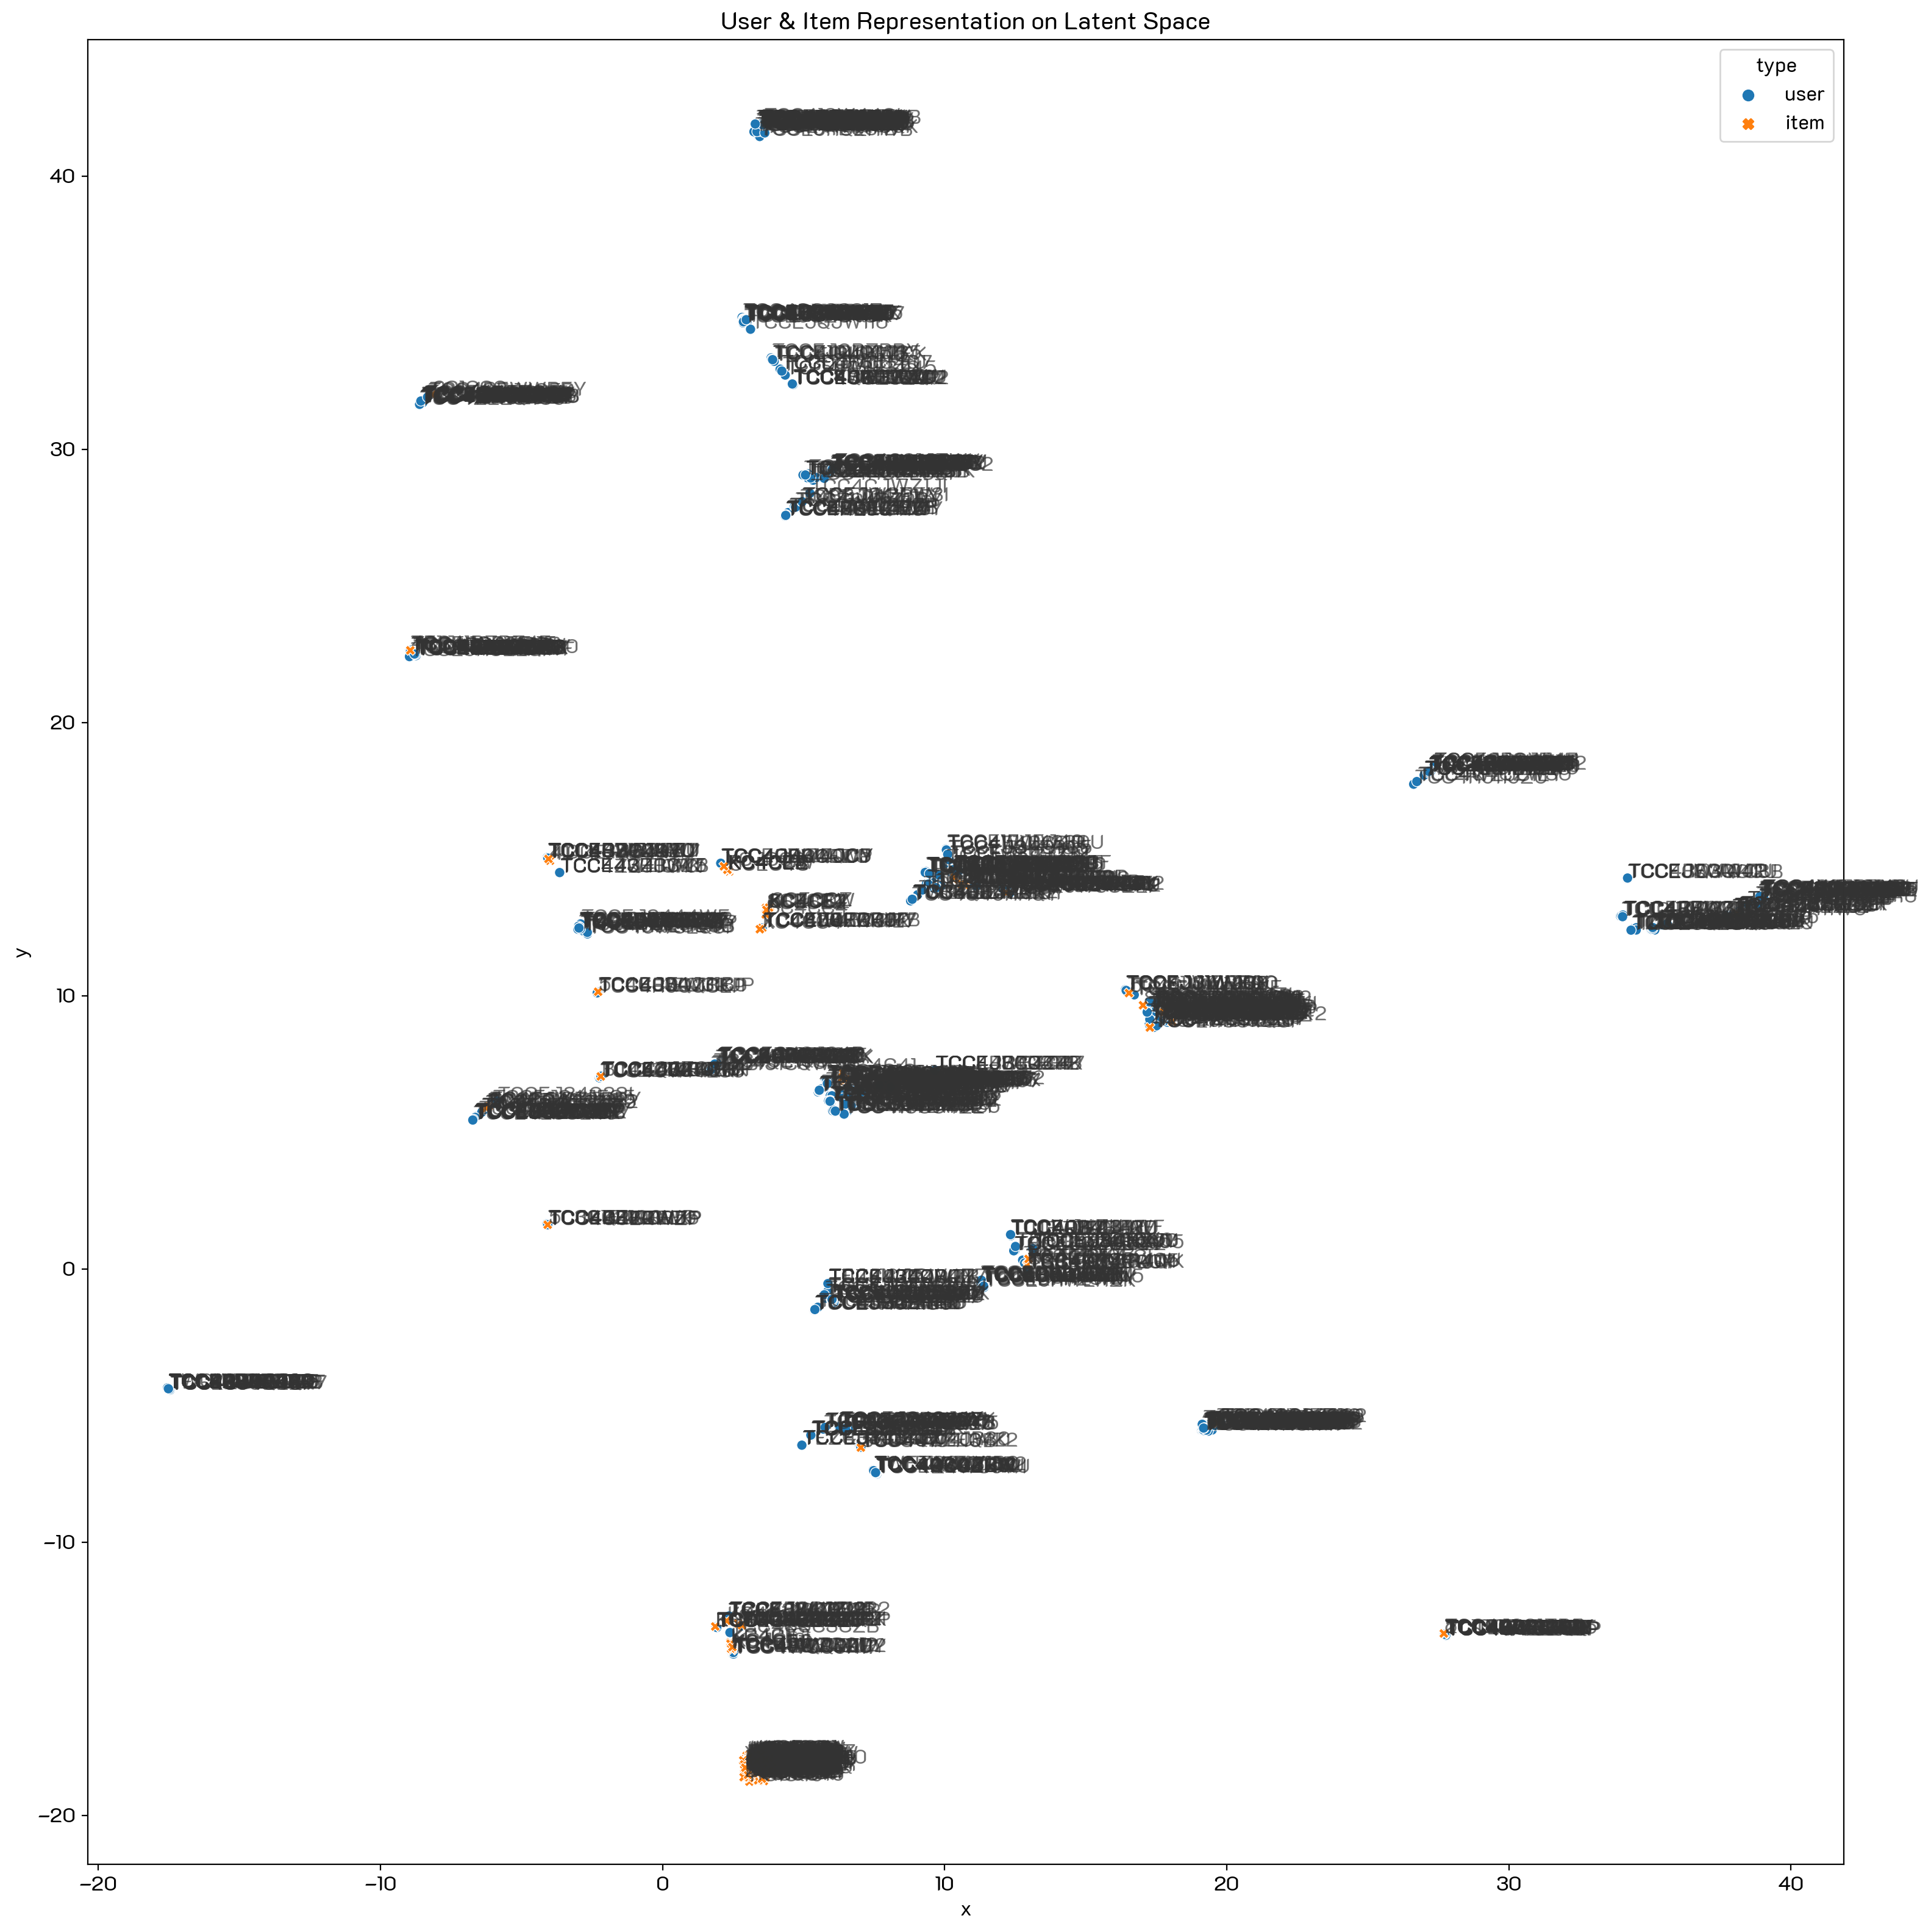

In [82]:
plt.figure(figsize=(16,16), tight_layout=True)
sns.scatterplot(x='x', y='y', hue='type', data=latent_df, style='type')
for i,r in latent_df.iterrows():
    px, py, text = r['x'], r['y'], r['label']
    plt.annotate(text, (px+.02,py+.02), color='.2', alpha=.7)
plt.title('User & Item Representation on Latent Space')
plt.savefig('user-item-latent-space.png', dpi=120)
plt.show()

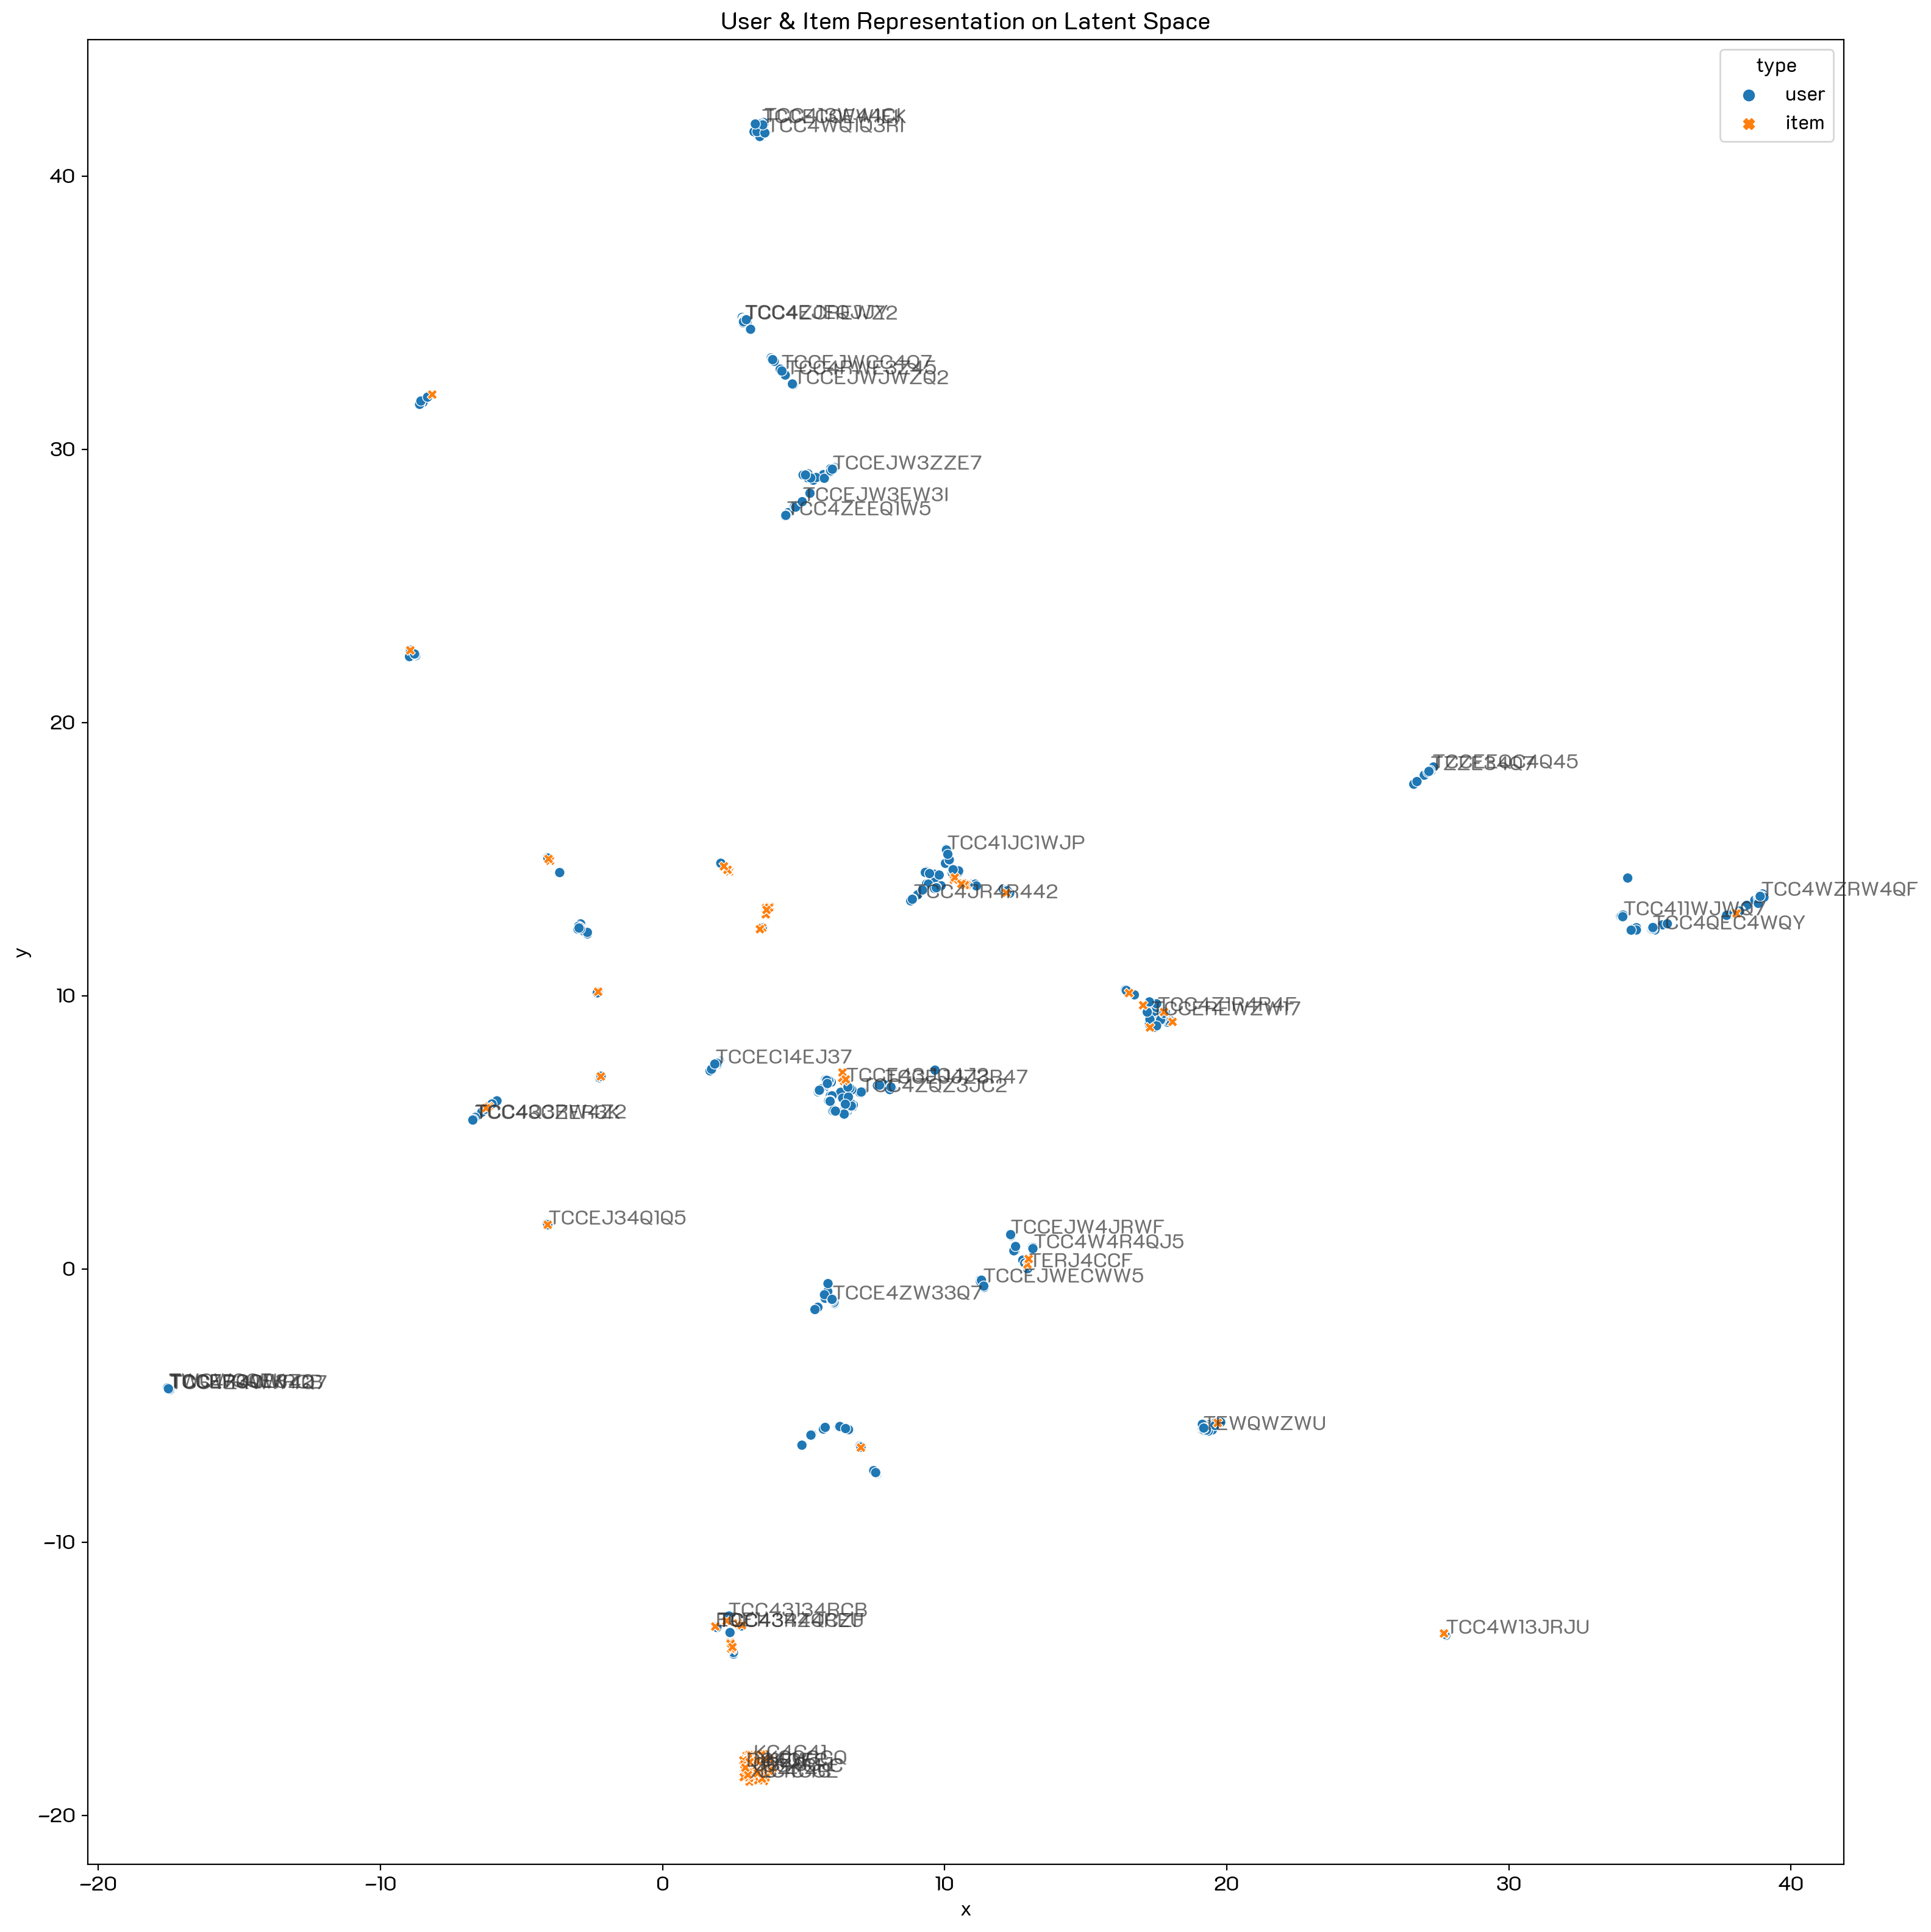

In [83]:
sample_df = latent_df.sample(n=50, random_state=42)
plt.figure(figsize=(16,16), tight_layout=True)
sns.scatterplot(x='x', y='y', hue='type', data=latent_df, style='type')
for i,r in sample_df.iterrows():
    px, py, text = r['x'], r['y'], r['label']
    plt.annotate(text, (px+.02,py+.02), color='.2', alpha=.7)
plt.title('User & Item Representation on Latent Space')
plt.savefig('user-item-latent-space.png', dpi=120)
plt.show()

In [84]:
# sample_df = latent_df.sample(n=100, random_state=42)

 

# plt.figure(figsize=(16, 16), tight_layout=True)
# sns.scatterplot(x='x', y='y', hue='type', data=sample_df, style='type')

 

# for i, r in sample_df.iterrows():
#     px, py, text = r['x'], r['y'], r['label']
#     plt.annotate(text, (px + 0.02, py + 0.02), color='.2', alpha=0.7)

 

# plt.title('User & Item Representation on Latent Space')
# plt.savefig('user-item-latent-space.png', dpi=120)
# plt.show()

In [85]:
# import plotly.graph_objects as go
# import urllib, json

# url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
# response = urllib.request.urlopen(url)
# data = json.loads(response.read())

# # override gray link colors with 'source' colors
# opacity = 0.4
# # change 'magenta' to its 'rgba' value to add opacity
# data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
# data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
#                                     for src in data['data'][0]['link']['source']]

# fig = go.Figure(data=[go.Sankey(
#     valueformat = ".0f",
#     valuesuffix = "TWh",
#     # Define nodes
#     node = dict(
#       pad = 15,
#       thickness = 15,
#       line = dict(color = "black", width = 0.5),
#       label =  data['data'][0]['node']['label'],
#       color =  data['data'][0]['node']['color']
#     ),
#     # Add links
#     link = dict(
#       source =  data['data'][0]['link']['source'],
#       target =  data['data'][0]['link']['target'],
#       value =  data['data'][0]['link']['value'],
#       label =  data['data'][0]['link']['label'],
#       color =  data['data'][0]['link']['color']
# ))])

# fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
#                   font_size=10)
# fig.show()